**Desarrollado por:** Javier Fernando Botía Valderrama

*Docente del Departamento de Ingeniería de Sistemas*

**Materia:** Análisis Avanzado de Datos

**Departamento:** Ingeniería Aeroespacial

**Facultad de Ingeniería - Universidad de Antioquia**

# Aprendizaje Supervisado Parte 3

In [2]:
import pandas as pd
import numpy as np
import requests
import io
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier # Se llama a la librería del método Random Forest
from sklearn.ensemble import GradientBoostingClassifier # GBC
from sklearn.ensemble import AdaBoostClassifier # AdaBoost
from sklearn.ensemble import HistGradientBoostingClassifier # Histogram Gradient Boosting Classifier

from sklearn.model_selection import train_test_split # Esta clase realiza la partición de datos en entrenamiento y prueba
from sklearn.preprocessing import LabelEncoder # Codificación de etiquetas
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import fbeta_score # Métrica F beta
from sklearn.metrics import classification_report # Para generar un reporte general de la clasificación
from sklearn.metrics import confusion_matrix # Matriz de confusión
from sklearn.metrics import roc_auc_score # ROC y AUC multiclase

In [3]:
url = "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/vehicle.dat"
download = requests.get(url).content
data = pd.read_table(io.StringIO(download.decode('utf-8')), sep=',',
                     decimal = ',')
# Esimportante codificarlo a utf-8
display(data.head(20))

,Compactness,Circularity,Distance_circularity,Radius_ratio,Praxis_aspect_ratio,Max_length_aspect_ratio,Scatter_ratio,Elongatedness,Praxis_rectangular,Length_rectangular,Major_variance,Minor_variance,Gyration_radius,Major_skewness,Minor_skewness,Minor_kurtosis,Major_kurtosis,Hollows_ratio,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus
5,107,57,106,172,50,6,255,26,28,169,280,957,264,85,5,9,181,183,bus
6,97,43,73,173,65,6,153,42,19,143,176,361,172,66,13,1,200,204,bus
7,90,43,66,157,65,9,137,48,18,146,162,281,164,67,3,3,193,202,van
8,86,34,62,140,61,7,122,54,17,127,141,223,112,64,2,14,200,208,van
9,93,44,98,197,62,11,183,36,22,146,202,505,152,64,4,14,195,204,saab


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Compactness               846 non-null    int64 
 1    Circularity              846 non-null    int64 
 2    Distance_circularity     846 non-null    int64 
 3    Radius_ratio             846 non-null    int64 
 4    Praxis_aspect_ratio      846 non-null    int64 
 5    Max_length_aspect_ratio  846 non-null    int64 
 6    Scatter_ratio            846 non-null    int64 
 7    Elongatedness            846 non-null    int64 
 8    Praxis_rectangular       846 non-null    int64 
 9    Length_rectangular       846 non-null    int64 
 10   Major_variance           846 non-null    int64 
 11   Minor_variance           846 non-null    int64 
 12   Gyration_radius          846 non-null    int64 
 13   Major_skewness           846 non-null    int64 
 14   Minor_skewness           

In [5]:
LE = LabelEncoder()
data[' Class'] = LE.fit_transform(data[' Class'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Compactness               846 non-null    int64
 1    Circularity              846 non-null    int64
 2    Distance_circularity     846 non-null    int64
 3    Radius_ratio             846 non-null    int64
 4    Praxis_aspect_ratio      846 non-null    int64
 5    Max_length_aspect_ratio  846 non-null    int64
 6    Scatter_ratio            846 non-null    int64
 7    Elongatedness            846 non-null    int64
 8    Praxis_rectangular       846 non-null    int64
 9    Length_rectangular       846 non-null    int64
 10   Major_variance           846 non-null    int64
 11   Minor_variance           846 non-null    int64
 12   Gyration_radius          846 non-null    int64
 13   Major_skewness           846 non-null    int64
 14   Minor_skewness           846 non-null    

In [6]:
X = data.iloc[:,:18] # Datos
Y = data[' Class'] # Vector de Clases

In [7]:
MM = MinMaxScaler()
features = X.columns
X_Norm = MM.fit_transform(X)
X_Norm = pd.DataFrame(X_Norm, columns = features)

In [8]:
X_Norm_Train, X_Norm_Test, Y_Train, Y_Test = train_test_split(X_Norm, Y, test_size = 0.3, train_size = 0.7, random_state = 17)
print("Tamaño de los Datos de Entrenamiento = ", X_Norm_Train.shape)
print("Tamaño de los Datos de Validación = ", X_Norm_Test.shape)
print("Tamaño del Vector de Clases de Entrenamiento = ", Y_Train.shape)
print("Tamaño del Vector de Clases de Prueba = ", Y_Test.shape)

Tamaño de los Datos de Entrenamiento =  (592, 18)
Tamaño de los Datos de Validación =  (254, 18)
Tamaño del Vector de Clases de Entrenamiento =  (592,)
Tamaño del Vector de Clases de Prueba =  (254,)


## Modelos de Clasificación de Datos MultiClase: Métodos de Ensamble (Ensemble Methods) 

Un Método de Ensamble es una estrategía para reducir la varianza de los modelos de clasificación, usando múltiples modelos de clasificación para obtener un aumento en la precisión y exactitud del modelo general que **ensambla** los modelos de clasificación generados.

Con la estrategía de ensamble, se puede crear varios clasificadores generados por diferentes algoritmos de clasificación, tal que se puede crear un modelo ensamblado que considere la diversidad que ofrece cada clasificador. Usualmente, los modelos basado en árboles, como el árbol de decisión, es capaz de generar un óptimo ensamble de varios clasificadores. 

<div>
<img src="https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/Ensamble.jpg" width="1500"/>
</div>

## Boostrapping

Boostrapping es un método de muestreo con reposición de un conjunto de datos observados, el cual permite evaluar la variabilidad de un estadístico de una muestra, como la media, la mediana o la moda. La ventaja de realizar Boostrapping es que no es necesario realizar una análisis exhaustivo de una distribución muestral de datos, sino que se puede **combinar** varias distribuciones muestrales para crear un modelo generalizado.

En la siguiente imagen, se observa la aplicación de la técnica con 10 muestras. En este caso, se aplico un algoritmo pseudoaleatorio para generar valores aleatorios entre 0 y 1. Por ejemplo:

$\lbrace$ 0.1911$\,$,    0.3234$\,$,    0.9018$\,$,    0.4510$\,$,    0.8109$\,$,    0.9098$\,$,    0.1918$\,$,    0.2291$\,$,    0.3721$\,$,    0.4053 $\rbrace$

Este vector de valores tiene un tamaño de 1 x 10 muestras.

Luego, se múltiplica cada uno de los valores por el número máximo de muestras, que en este caso, es 10.

$\lbrace$ 1.9107$\,$,    3.2337$\,$,    9.0179$\,$,    4.5099$\,$,    8.1091$\,$,    9.0981$\,$,    1.9184$\,$,    2.2909$\,$,    3.7213$\,$,    4.0532 $\rbrace$

A partir de este vector, se aplica un redondeo para obtener valores enteros:

$\lbrace$ 2$\,$,     3$\,$,     9$\,$,     5$\,$,     8$\,$,     9$\,$,     2$\,$,     2$\,$,     4$\,$,     4 $\rbrace$

Se organizan de menor a mayor y obtenemos las muestras de bootstrap:

$\lbrace$ 2$\,$,     2$\,$,     2$\,$,     3$\,$,     4$\,$,     4$\,$,     5$\,$,     8$\,$,     9$\,$,     9 $\rbrace$

<div>
<img src="https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/Bootstrapping.jpg" width="1500"/>
</div>

El gráfico fue generado en Matlab a partir de la explicación dada por: "Suthaharan, S. *Machine Learning Models and Algorithms for Big Data Classification,* Springer, New York, USA, 2016, pp. 276-277."

## Bagging

Es un método general para conformar una colección de modelos mediante boostrapping de los datos. Lo anterior quiere decir que cada nuevo modelo o clasificador que se va creando se ajusta a un remuestreo de boostrapping. Este procedimiento se realiza en un conjunto de pasos, como se muestra a continuación:

1.   Se define un conjunto de **estimadores o modelos** que se desea ajustar y un número de registros o datos que se desea utilizar para crear cada estimador.
2.   Se realiza un remuestreo de los datos con boostrapping para realizar una reposición de datos en cada registro.
3.   Se entrena cada estimador usando cada registro remuestreado para crear una función de decisión o frontera de separación de datos.
4.   Para crear cada estimador, se sigue los pasos 2 y 3 hasta construir todos los estimadores definidos por el usuario.
5.   Se **unifican** todos los estimadores para obtener el modelo general o clasificador principal.



<div>
<img src="https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/Bagging.jpg" width="1500"/>
</div>

## Boosting

Es un método general para ajustar una secuencia de modelos o clasificadores a partir de una ponderación o pesos. En este caso, el método da mayor peso a los registros con grandes residuos para cada ronda **secuencial** o sucesiva. Esta estrategía permite minimizar el error de un modelo anterior con respecto al modelo actual.

Para aplicar Boosting, se debe seguir la siguiente secuencia de pasos:

1.   Definimos un número de modelos o estimadores e inicializamos las ponderaciones de cada muestra de los datos como $w_n = \frac{1}{N}$, donde $N$ es el número de muestras de la base de datos.
2.   A partir de las ponderaciones, se crea un modelo, $g_m$, que minimice el error de la ponderación, $e_m$, el cual es la suma de las ponderaciones de las muestras de los datos mal clasificadas.
3.   Se realiza una agregación del modelo al conjunto de modelos, $f_m$:

$$f_m = f_{m-1} + \alpha_m g_{m}$$

donde $\alpha_m = \frac{log\lbrack 1 - e_m\rbrack}{e_m}$

4.   Se actualiza los valores de las ponderaciones o pesos para que se incrementen su valor cuando las muestras que se clasificaron son erroneas. Lo anterior depende de $\alpha_m$, lo cual si $\alpha_m$ es grande, entonces los valores de los pesos van a aumentar.

5.   Incrementamos $m = m + 1$ y volvemos al paso 2.

6.   Una vez obtenido todos los conjuntos de modelos, se obtiene el modelo general

$$F = \alpha_1f_1 + \alpha_2f_2 + \cdots + \alpha_Mf_M$$


<div>
<img src="https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/Boosting.jpg" width="1500"/>
</div>

**Notas:**  
- Boosting -> preferido por ser sofisticado, pero con costo computacional alto
- Bagging -> construcción de modelo más rápida

## Random Forest (Bósques Aleatorios)

Es un método de aprendizaje supervisado que forma estructuras de árboles de decisiones, creando un **bosque** mediante un muestreo aleatorio con reemplazos entre árboles. Este tipo de estrategía que usa el método es apto para tareas de clasificación como de regresión debido a que su principal ventaja es proporcionar múltiples árboles de decisión en tareas de clasificación o de regresión. Dentro del concepto de random forest, hay varias características especiales de este método, tales como:

1) **Estructura Paralela:** Es una de las características más relevantes del método porque ayuda a crear mútiples árboles de decisión al mismo tiempo para hacer tareas de clasificación. Lo anterior permite crear múltiples dominios con los datos de entrenamiento, observando las fronteras de decisión que generan en cada árbol. Este tipo de característica ayuda a visualizar mejor la clasificación de grandes volúmenes de datos mediante un framework tales como map-reduce o  sistemas de archivo distribuido hadoop. Para mayor información de este tipo de framework, ir a la siguiente url: https://hadoop.apache.org/docs/r1.2.1/mapred_tutorial.html

2) **Parámetros del Modelo:** Los parámetros del modelo son muy similares con respecto al árbol de decisión pero se adiciona otros parámetros para representar el número de subconjuntos de características o importancia de las características, mediante la selección del número de árboles de decisión para construir el modelo.

3) **Función de Pérdida:** Al igual que en otros modelos de clasificación o de regresión, este método adopta una función de pérdida para resolver un modelo de optimización. En este caso, los parámetros son optimizados por un **muestreo bootstrap o de arranque** y la integración de un subespacio de las mejores características para construir el modelo. Lo anterior se integra a las funciones de impureza y de entropia mencionadas en el árbol de decisión.

4) **Bagging o Empaquetamiento:** Es una técnica que determina el promedio de las respuestas de predicción o de clasificación de las muestras de bootstrap, el cual permite obtener una predicción o clasificación final . En el caso de random forest, esta técnica es implementada en la etapa de validación y prueba, permitiendo evaluar mejor el desempeño de los resultados.

5) **Parametrización:** En el modelo random forest, debido al uso de las técnicas de Bootstrapping y Bagging, se requiere de un conjunto de parámetros que restringe el tamaño de selección del subespacio para encontrar las mejores características. Hay dos opciones de restricción:

5.1) *Restricción de Breiman:* $n << d$, donde $n$ es el número de muestras de bootstrap y $d$ es el número de características que determina la dimensionalidad de los datos y contribuye a mejorar el escalamiento para problemas de grandes volúmenes de datos.

5.2) *Restricción por nodos de un árbol:* $n \leq \sqrt{d}$.

**Estructura general de Random Forest:**

<div>
<img src="https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/RandomForest.jpg" width="1500"/>
</div>

In [9]:
Number_Muestras_por_Clase = Y_Train.value_counts()
Number_Muestras_por_Clase = Number_Muestras_por_Clase.sort_index(axis = 0, ascending = True)
print(Number_Muestras_por_Clase)

0    155
1    138
2    156
3    143
Name:  Class, dtype: int64


In [10]:
Numero_de_Clases = len(Number_Muestras_por_Clase.index)
Peso_por_Clase = len(Y_Train)/(Numero_de_Clases*Number_Muestras_por_Clase)
print(Peso_por_Clase)

0    0.954839
1    1.072464
2    0.948718
3    1.034965
Name:  Class, dtype: float64


In [11]:
RF_1 = RandomForestClassifier(n_estimators = 100, criterion='entropy', max_depth = 5, min_samples_split=2, 
                            min_samples_leaf=1, max_features='auto', bootstrap=True, 
                            class_weight =  {0: Peso_por_Clase[0], 1: Peso_por_Clase[1], 2: Peso_por_Clase[2],
                                             3: Peso_por_Clase[3]}, ccp_alpha = 0.0)

RF_2 = RandomForestClassifier(n_estimators = 300, criterion='gini', max_depth = 5, min_samples_split=2, 
                            min_samples_leaf=1, max_features='auto', bootstrap=True, 
                            class_weight = {0: Peso_por_Clase[0], 1: Peso_por_Clase[1], 2: Peso_por_Clase[2],
                                             3: Peso_por_Clase[3]}, ccp_alpha = 0.0)

In [12]:
RF_1.fit(X_Norm_Train, Y_Train)
RF_2.fit(X_Norm_Train, Y_Train)

RandomForestClassifier(class_weight={0: 0.9548387096774194,
                                     1: 1.0724637681159421,
                                     2: 0.9487179487179487,
                                     3: 1.034965034965035},
                       max_depth=5, n_estimators=300)

In [13]:
def grafica_caracteristicas_importantes(model, nombres_caracteristicas, X_Train):
    muestras, N_Caracteristicas = X_Train.shape
    del muestras
    fig = plt.figure(figsize=(12,8))
    plt.barh(range(N_Caracteristicas), model.feature_importances_, align = 'center')
    plt.yticks(np.arange(N_Caracteristicas), nombres_caracteristicas)
    plt.xlabel("Importancia de las características")
    plt.ylabel("Características")
    plt.show()

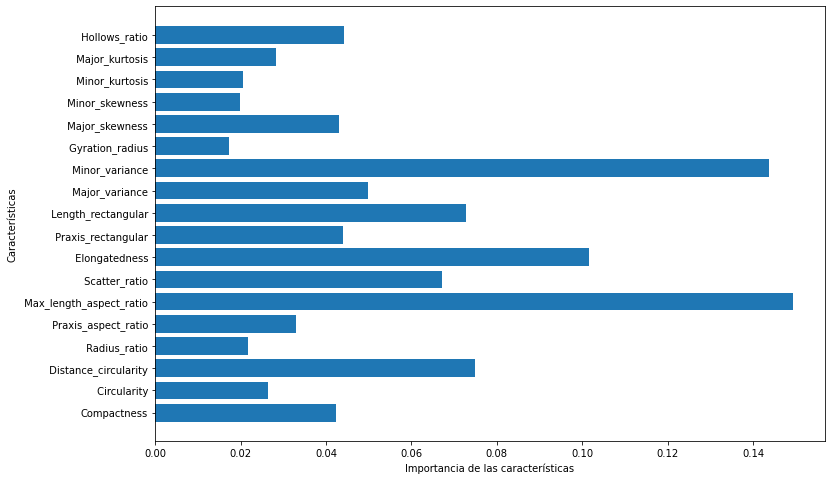

In [14]:
Caracteristicas = X_Norm_Train.columns
grafica_caracteristicas_importantes(RF_1, Caracteristicas, X_Norm_Train)

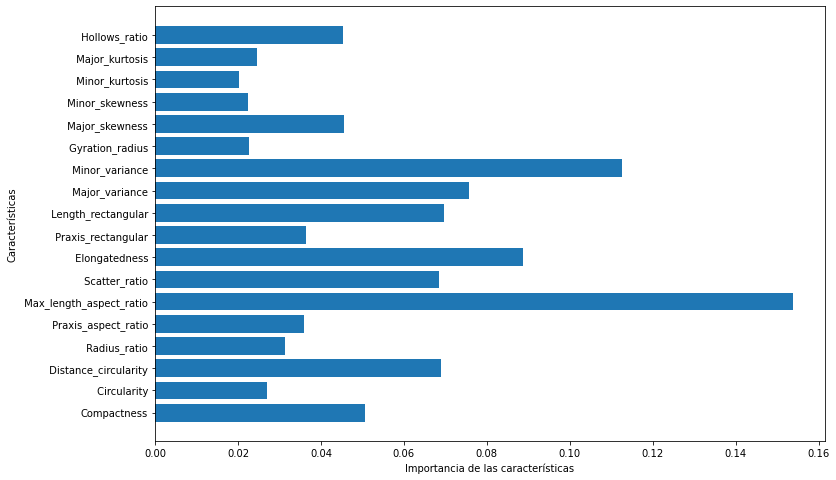

In [15]:
Caracteristicas = X_Norm_Train.columns
grafica_caracteristicas_importantes(RF_2, Caracteristicas, X_Norm_Train)

In [16]:
Clases_RF_1 = RF_1.predict(X_Norm_Test)
Clases_RF_2 = RF_2.predict(X_Norm_Test)

print("Exactitud RF 1 = {:.4f} %".format(100*RF_1.score(X_Norm_Test, Y_Test)))
print("Exactitud RF 2 = {:.4f} %".format(100*RF_2.score(X_Norm_Test, Y_Test)))

Exactitud RF 1 = 70.8661 %
Exactitud RF 2 = 70.4724 %


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to s

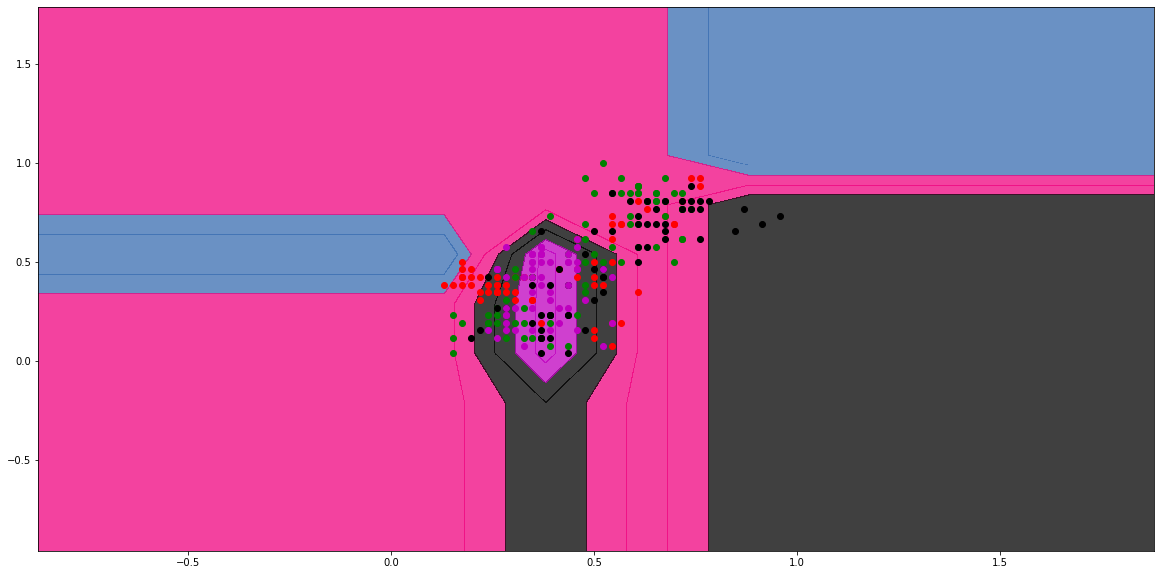

In [17]:
MM = MinMaxScaler()
X_Norm_2 = MM.fit_transform(X_Norm.iloc[:,0:2])
X_Norm_2 = pd.DataFrame(X_Norm_2, columns = ['Aa','Ao'])
X_Norm_2_Train, X_Norm_2_Test, Y_2_Train, Y_2_Test = train_test_split(X_Norm_2, Y, test_size = 0.3, train_size = 0.7, random_state = 17)
RF_1 = RandomForestClassifier(n_estimators = 100, criterion='entropy', max_depth = 5, min_samples_split=2, 
                            min_samples_leaf=1, max_features='auto', bootstrap=True, 
                            class_weight =  {0: Peso_por_Clase[0], 1: Peso_por_Clase[1], 2: Peso_por_Clase[2],
                                             3: Peso_por_Clase[3]}, ccp_alpha = 0.0)
RF_1.fit(X_Norm_2_Train, Y_2_Train)

X_set, y_set = MM.inverse_transform(X_Norm_2_Test), Y_2_Test

# Definir las fronteras
min1, max1 = X_set[:, 0].min() - 1, X_set[:, 0].max() + 1 # Aa
min2, max2 = X_set[:, 1].min() - 1, X_set[:, 1].max() + 1 # Ao

# Escalando los datos
x_scale, y_scale = np.arange(min1, max1, 0.25), np.arange(min2, max2, 0.25)

#Generando una rejilla de las características Aa y Ao
X1, X2 = np.meshgrid(x_scale, y_scale)
X_flatten = np.array([X1.ravel(), X2.ravel()])

X_transformado = MM.transform(X_flatten.T)
Clases_2_RF_2 = RF_1.predict(X_transformado).reshape(X1.shape)

plt.figure(figsize=(20,10))

# Graficando el contorno
plt.contourf(X1, X2, Clases_2_RF_2, alpha = 0.75, cmap = ListedColormap(('#386cb0', '#f0027f','k','m')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0],X_set[y_set == j, 1],c = ListedColormap(('red', 'green','k','m'))(i),label = j)

plt.show()

## Gradient Boosting

Es un algoritmo que permite construir un árbol ensamblado paso a paso con el objetivo de minimizar una función de pérdida de clasificación, lo cual garantiza el mínimo error de clasificación del modelo. Por lo general el gradiente se utiliza para minimizar la función de pérdida, el cual la función de Boosting visto en anteriores secciones se puede reescribir como:

$$y_m = y_{m-1} + \alpha_m \sum_i \nabla L (y_{T_i}, y_{m_i})$$

donde $y$ es una clase y $y_{T_i}$ es la clase objetivo

NOTA: el algoritmo utiliza un parámetro de tasa de aprendizaje, lo cual se sugiere que si el número de estimadores o modelos es grande entonces el valor de tasa de aprendizaje debe ser menor a 0.1. Como punto de partida, se recomienda empezar con 100 estimadores y una tasa de aprendizaje de 0.05

In [18]:
GBC_1 = GradientBoostingClassifier(loss='deviance', learning_rate=0.05, n_estimators=100, 
                                 criterion='friedman_mse', min_samples_split=2, 
                                 min_samples_leaf=1, max_depth=4, max_features='auto', 
                                 tol = 1e-3, ccp_alpha = 0.0)

GBC_2 = GradientBoostingClassifier(loss='deviance', learning_rate=0.01, n_estimators=300, 
                                 criterion='squared_error', min_samples_split=2, 
                                 min_samples_leaf=1, max_depth=4, max_features='auto', 
                                 tol = 1e-3, ccp_alpha = 0.0)

In [19]:
GBC_1.fit(X_Norm_Train, Y_Train)
GBC_2.fit(X_Norm_Train, Y_Train)

GradientBoostingClassifier(criterion='squared_error', learning_rate=0.01,
                           max_depth=4, max_features='auto', n_estimators=300,
                           tol=0.001)

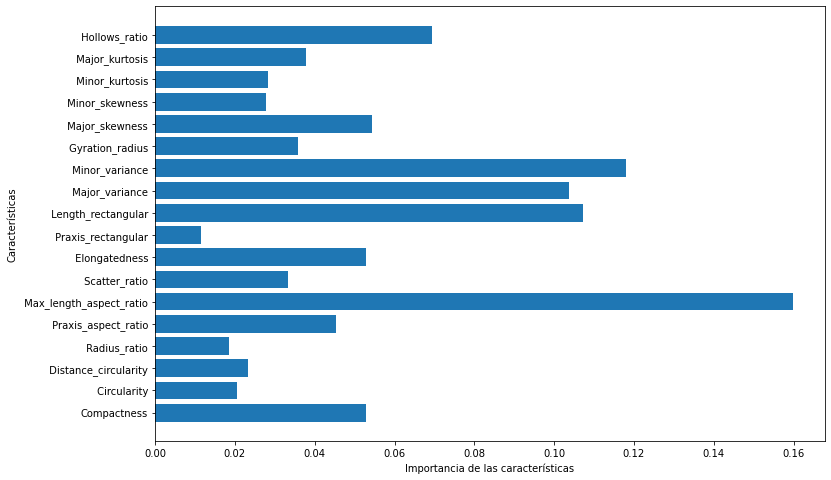

In [20]:
Caracteristicas = X_Norm_Train.columns
grafica_caracteristicas_importantes(GBC_1, Caracteristicas, X_Norm_Train)

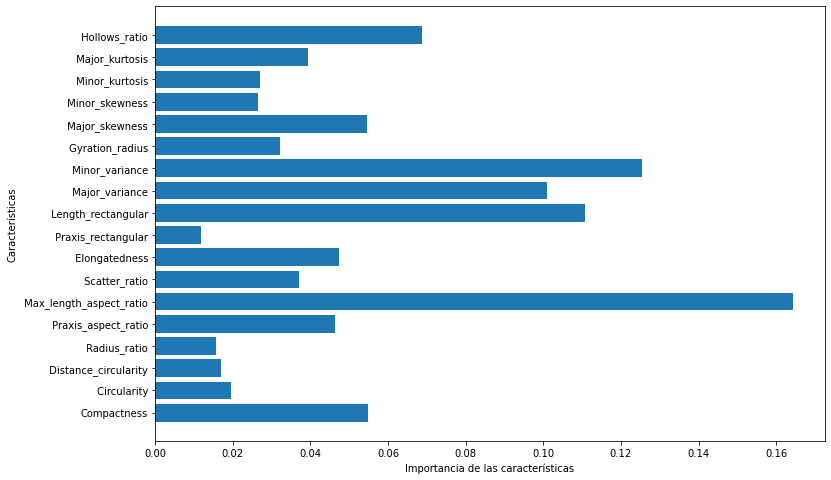

In [21]:
grafica_caracteristicas_importantes(GBC_2, Caracteristicas, X_Norm_Train)

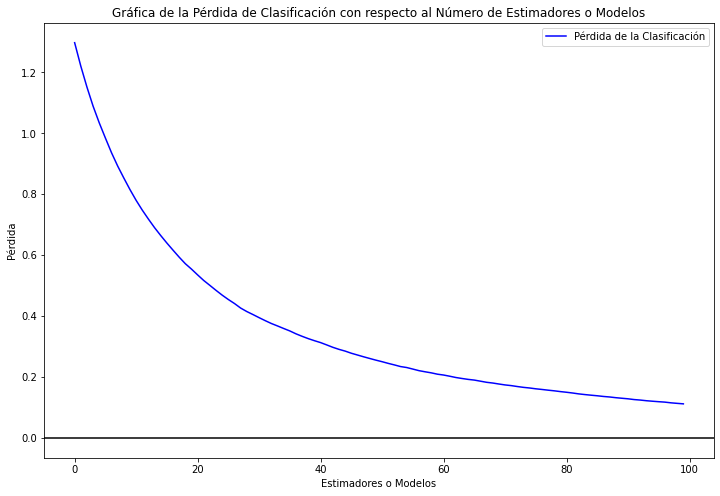

In [22]:
fig = plt.figure(figsize=(12,8))
line_1 = plt.plot(np.arange(len(GBC_1.train_score_)), GBC_1.train_score_, color = 'b', label='Pérdida de la Clasificación') 
plt.axhline(0, color="black") # Elegir color de la linea horizontal de referencia
plt.legend()
plt.title('Gráfica de la Pérdida de Clasificación con respecto al Número de Estimadores o Modelos') 
# Titulo de la gráfica
plt.xlabel('Estimadores o Modelos') # Etiqueta del eje x
plt.ylabel('Pérdida') # Etiqueta del eje y
plt.show() # Mostrar gráfica

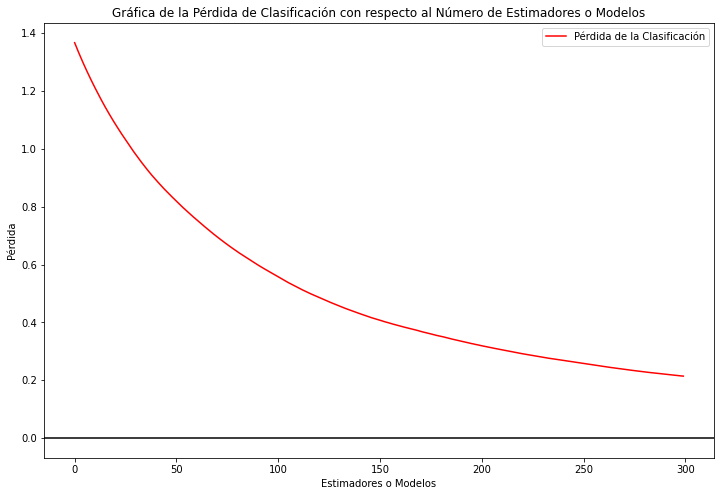

In [23]:
fig = plt.figure(figsize=(12,8))
line_1 = plt.plot(np.arange(len(GBC_2.train_score_)), GBC_2.train_score_, color = 'r', label='Pérdida de la Clasificación') 
plt.axhline(0, color="black") # Elegir color de la linea horizontal de referencia
plt.legend()
plt.title('Gráfica de la Pérdida de Clasificación con respecto al Número de Estimadores o Modelos') 
# Titulo de la gráfica
plt.xlabel('Estimadores o Modelos') # Etiqueta del eje x
plt.ylabel('Pérdida') # Etiqueta del eje y
plt.show() # Mostrar gráfica

In [24]:
Clases_GBC_1 = GBC_1.predict(X_Norm_Test)
Clases_GBC_2 = GBC_2.predict(X_Norm_Test)

print("Exactitud GBC 1 = {:.4f} %".format(100*GBC_1.score(X_Norm_Test, Y_Test)))
print("Exactitud GBC 2 = {:.4f} %".format(100*GBC_2.score(X_Norm_Test, Y_Test)))

Exactitud GBC 1 = 71.6535 %
Exactitud GBC 2 = 71.6535 %


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend 

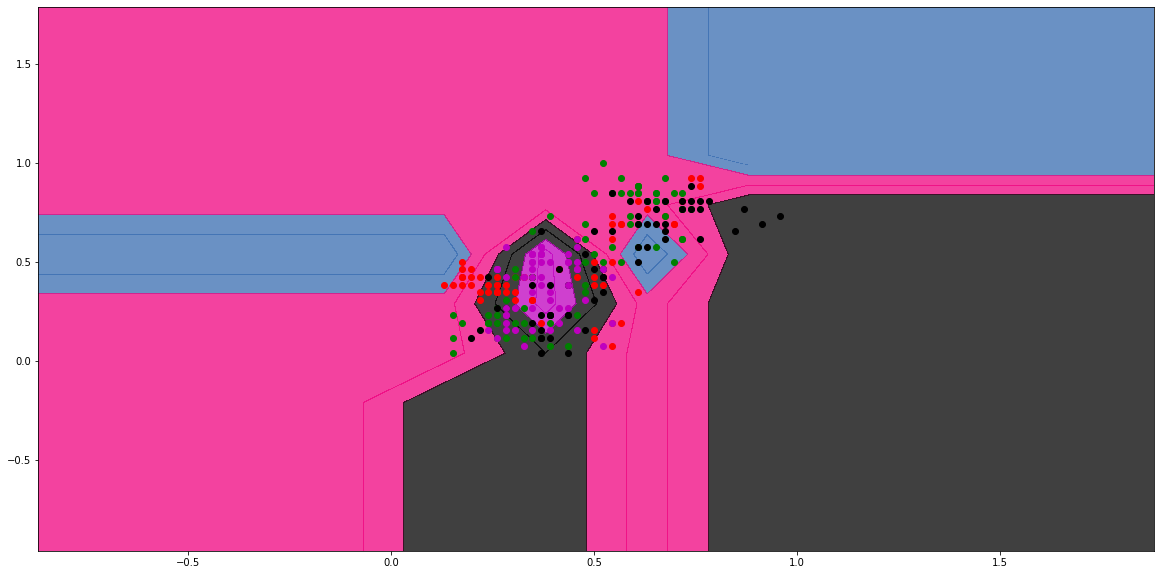

In [25]:
MM = MinMaxScaler()
X_Norm_2 = MM.fit_transform(X_Norm.iloc[:,0:2])
X_Norm_2 = pd.DataFrame(X_Norm_2, columns = ['Aa','Ao'])
X_Norm_2_Train, X_Norm_2_Test, Y_2_Train, Y_2_Test = train_test_split(X_Norm_2, Y, test_size = 0.3, train_size = 0.7, random_state = 17)
GBC_2 = GradientBoostingClassifier(loss='deviance', learning_rate=0.01, n_estimators=300, 
                                 criterion='squared_error', min_samples_split=2, 
                                 min_samples_leaf=1, max_depth=4, max_features='auto', 
                                 tol = 1e-3, ccp_alpha = 0.0)
GBC_2.fit(X_Norm_2_Train, Y_2_Train)

X_set, y_set = MM.inverse_transform(X_Norm_2_Test), Y_2_Test

# Definir las fronteras
min1, max1 = X_set[:, 0].min() - 1, X_set[:, 0].max() + 1 # Aa
min2, max2 = X_set[:, 1].min() - 1, X_set[:, 1].max() + 1 # Ao

# Escalando los datos
x_scale, y_scale = np.arange(min1, max1, 0.25), np.arange(min2, max2, 0.25)

#Generando una rejilla de las características Aa y Ao
X1, X2 = np.meshgrid(x_scale, y_scale)
X_flatten = np.array([X1.ravel(), X2.ravel()])

X_transformado = MM.transform(X_flatten.T)
Clases_2_GBC_2 = GBC_2.predict(X_transformado).reshape(X1.shape)

plt.figure(figsize=(20,10))

# Graficando el contorno
plt.contourf(X1, X2, Clases_2_GBC_2, alpha = 0.75, cmap = ListedColormap(('#386cb0', '#f0027f','k','m')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0],X_set[y_set == j, 1],c = ListedColormap(('red', 'green','k','m'))(i),label = j)

plt.show()

## AdaBoost

Es un algoritmo de Boosting Adaptativo cuya estructura básica es un árbol de decisión pero con los datos usados para entrenar continuamente para forzar al modelo a adaptarse a la distribución natural de los datos. Esta estrategia permite enfocar el algoritmo en las muestras de los datos mal clasificados para corregir el error de clasificación y reducir el error. En cada iteración, un factor de peso se aplica para cada muestra de los datos, lo cual incrementa la importancia de las muestras que predice mal y disminuye la importancia para aquellas muestras que clasifico bien. De esta manera, el algoritmo se focaliza la adaptación en las muestras mal clasificadas 

In [26]:
ADC_1 = AdaBoostClassifier(n_estimators = 50, learning_rate=1.0, algorithm='SAMME.R')
ADC_2 = AdaBoostClassifier(n_estimators = 100, learning_rate=0.5, algorithm='SAMME.R')

In [27]:
ADC_1.fit(X_Norm_Train, Y_Train)
ADC_2.fit(X_Norm_Train, Y_Train)

AdaBoostClassifier(learning_rate=0.5, n_estimators=100)

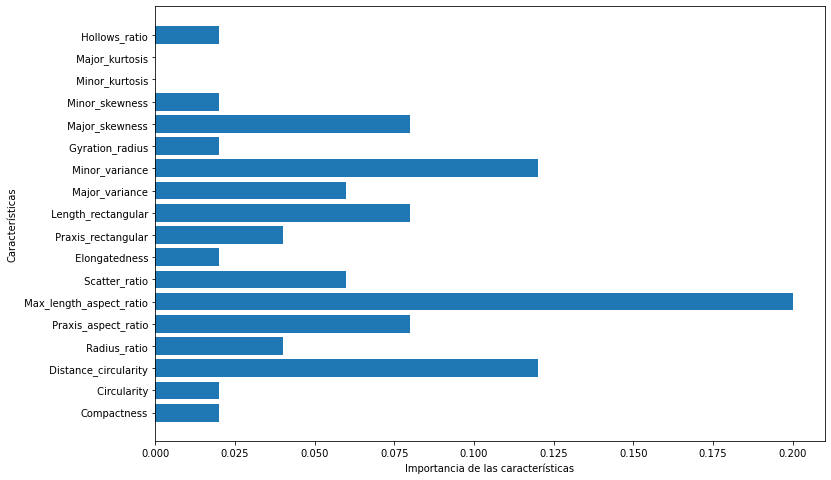

In [28]:
Caracteristicas = X_Norm_Train.columns
grafica_caracteristicas_importantes(ADC_1, Caracteristicas, X_Norm_Train)

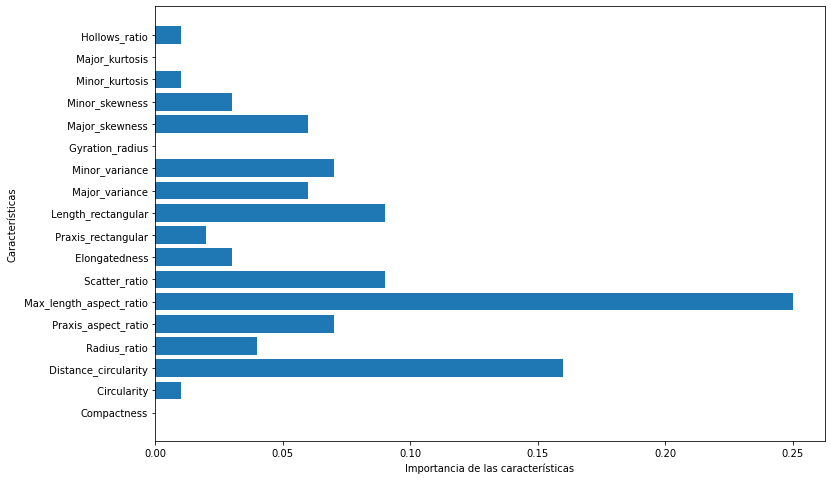

In [29]:
grafica_caracteristicas_importantes(ADC_2, Caracteristicas, X_Norm_Train)

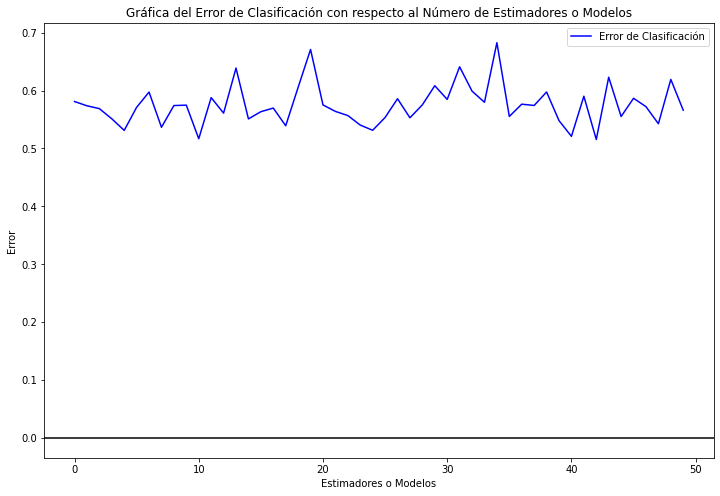

In [30]:
fig = plt.figure(figsize=(12,8))
line_1 = plt.plot(np.arange(len(ADC_1.estimator_errors_)), ADC_1.estimator_errors_, color = 'b', label='Error de Clasificación') 
plt.axhline(0, color="black") # Elegir color de la linea horizontal de referencia
plt.legend()
plt.title('Gráfica del Error de Clasificación con respecto al Número de Estimadores o Modelos') 
# Titulo de la gráfica
plt.xlabel('Estimadores o Modelos') # Etiqueta del eje x
plt.ylabel('Error') # Etiqueta del eje y
plt.show() # Mostrar gráfica

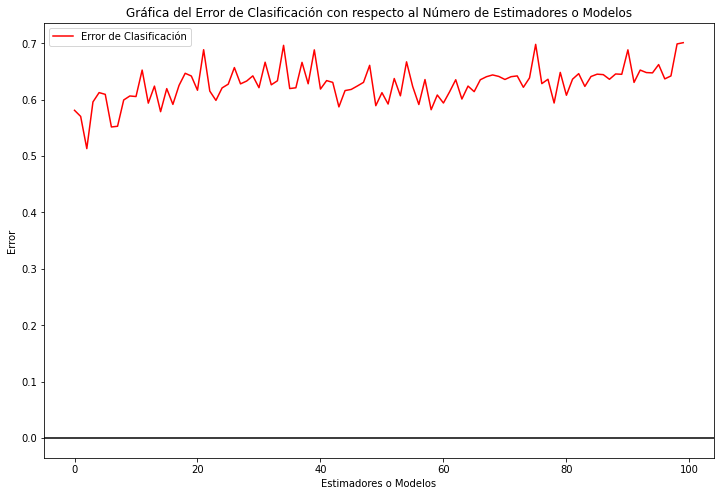

In [31]:
fig = plt.figure(figsize=(12,8))
line_1 = plt.plot(np.arange(len(ADC_2.estimator_errors_)), ADC_2.estimator_errors_, color = 'r', label='Error de Clasificación') 
plt.axhline(0, color="black") # Elegir color de la linea horizontal de referencia
plt.legend()
plt.title('Gráfica del Error de Clasificación con respecto al Número de Estimadores o Modelos') 
# Titulo de la gráfica
plt.xlabel('Estimadores o Modelos') # Etiqueta del eje x
plt.ylabel('Error') # Etiqueta del eje y
plt.show() # Mostrar gráfica

In [32]:
Clases_ADC_1 = ADC_1.predict(X_Norm_Test)
Clases_ADC_2 = ADC_2.predict(X_Norm_Test)

print("Exactitud ADC 1 = {:.4f} %".format(100*ADC_1.score(X_Norm_Test, Y_Test)))
print("Exactitud ADC 2 = {:.4f} %".format(100*ADC_2.score(X_Norm_Test, Y_Test)))

Exactitud ADC 1 = 59.0551 %
Exactitud ADC 2 = 56.6929 %


## Histogram Gradient Boosting

Es un algoritmo mejorado de Gradient Boosting para grandes volumenes de datos, pero con la particularidad de soportar bases de datos con datos faltantes.

In [33]:
HGB_1 = HistGradientBoostingClassifier(loss='auto', learning_rate = 0.1, max_iter = 1000, max_leaf_nodes = 31, 
                                       max_depth = 10, min_samples_leaf = 20, l2_regularization = 0.1, scoring='loss', 
                                       validation_fraction = 0.1, n_iter_no_change = 10, tol = 1e-5)

HGB_2 = HistGradientBoostingClassifier(loss='auto', learning_rate = 0.05, max_iter = 1000, max_leaf_nodes = 31, 
                                       max_depth = 10, min_samples_leaf = 20, l2_regularization = 0.05, scoring='loss', 
                                       validation_fraction = 0.1, n_iter_no_change = 10, tol = 1e-5)

In [34]:
HGB_1.fit(X_Norm_Train, Y_Train)
HGB_2.fit(X_Norm_Train, Y_Train)

HistGradientBoostingClassifier(l2_regularization=0.05, learning_rate=0.05,
                               max_depth=10, max_iter=1000, tol=1e-05)

In [35]:
Clases_HGB_1 = HGB_1.predict(X_Norm_Test)
Clases_HGB_2 = HGB_2.predict(X_Norm_Test)

print("Exactitud HGB_1 = {:.4f} %".format(100*HGB_1.score(X_Norm_Test, Y_Test)))
print("Exactitud HGB_2 = {:.4f} %".format(100*HGB_2.score(X_Norm_Test, Y_Test)))

Exactitud HGB_1 = 72.0472 %
Exactitud HGB_2 = 71.6535 %


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you int

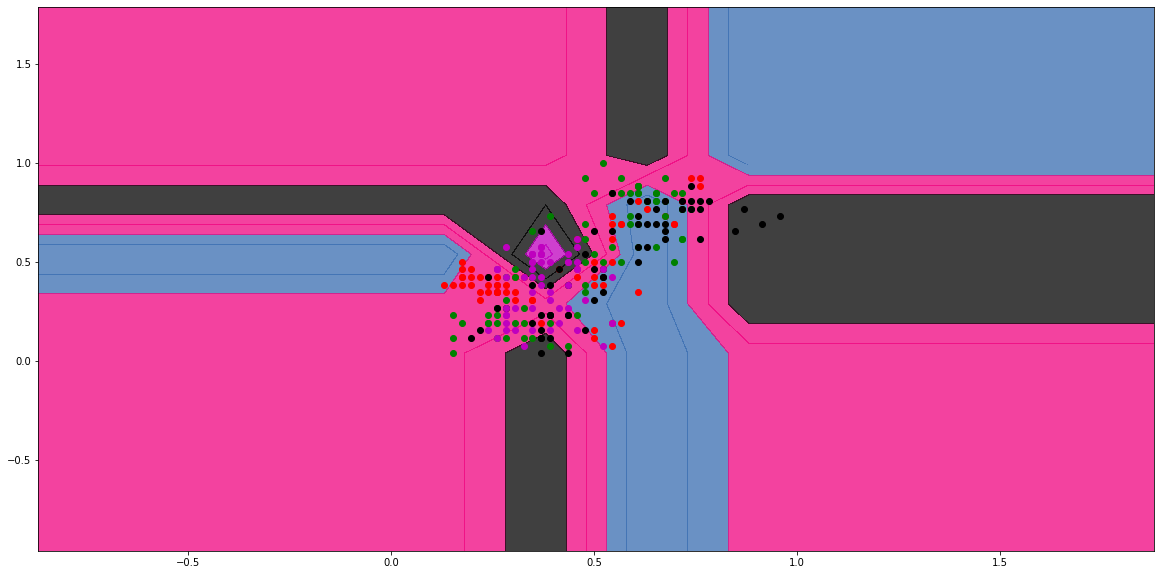

In [36]:
MM = MinMaxScaler()
X_Norm_2 = MM.fit_transform(X_Norm.iloc[:,0:2])
X_Norm_2 = pd.DataFrame(X_Norm_2, columns = ['Aa','Ao'])
X_Norm_2_Train, X_Norm_2_Test, Y_2_Train, Y_2_Test = train_test_split(X_Norm_2, Y, test_size = 0.3, train_size = 0.7, random_state = 17)
HGB_1 = HistGradientBoostingClassifier(loss='auto', learning_rate = 0.1, max_iter = 1000, max_leaf_nodes = 31, 
                                       max_depth = 10, min_samples_leaf = 20, l2_regularization = 0.1, scoring='loss', 
                                       validation_fraction = 0.1, n_iter_no_change = 10, tol = 1e-5)

HGB_1.fit(X_Norm_2_Train, Y_2_Train)

X_set, y_set = MM.inverse_transform(X_Norm_2_Test), Y_2_Test

# Definir las fronteras
min1, max1 = X_set[:, 0].min() - 1, X_set[:, 0].max() + 1 # Aa
min2, max2 = X_set[:, 1].min() - 1, X_set[:, 1].max() + 1 # Ao

# Escalando los datos
x_scale, y_scale = np.arange(min1, max1, 0.25), np.arange(min2, max2, 0.25)

#Generando una rejilla de las características Aa y Ao
X1, X2 = np.meshgrid(x_scale, y_scale)
X_flatten = np.array([X1.ravel(), X2.ravel()])

X_transformado = MM.transform(X_flatten.T)
Clases_2_HGB_1 = HGB_1.predict(X_transformado).reshape(X1.shape)

plt.figure(figsize=(20,10))

# Graficando el contorno
plt.contourf(X1, X2, Clases_2_HGB_1, alpha = 0.75, cmap = ListedColormap(('#386cb0', '#f0027f','k','m')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0],X_set[y_set == j, 1],c = ListedColormap(('red', 'green','k','m'))(i),label = j)

plt.show()

## Estrategía de Validación para Modelos Multiclase

Cuando se desea validar un modelo multiclase, se debe calcular el micro y macro promedio para ampliar la evaluación general del modelo. La estrategía que se utiliza para dichos promedios es **Uno vs Todos (OVA)**, el cual se define dos métricas básicas:

1.   **Micropromedio**: Se calcula a partir de los verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos de cada conjunto de datos que pertenece a una clase. Habitualmente, se considera los verdaderos y falsos positivos ($TP\,\,, FP$) para calcular el micropromedio:

$$Micro_{mean} = \frac{TP_1 + \cdots TP_k}{TP_1 + \cdots TP_k + FP_1 + \cdots FP_k}$$

donde $k$ es la etiqueta de la clase.

Por lo general, esta métrica permite ponderar cada muestra de los datos relacionado con una clase que predice el modelo.

2.   **Macropromedio**: Es la media de las clasificaciones para diferentes clases:

$$Macro_{mean} = \frac{Micro_{mean_1} + \cdots + Micro_{mean_k}}{k}$$

Esta métrica pondera todas las clases para generar una evaluación general del modelo. A diferencia del micropromedio, el macropromedio permite medir el desempeño del modelo cuando hay desbalance de clases.

In [37]:
HGB_1 = HistGradientBoostingClassifier(loss='auto', learning_rate = 0.1, max_iter = 1000, max_leaf_nodes = 31, 
                                       max_depth = 10, min_samples_leaf = 20, l2_regularization = 0.1, scoring='loss', 
                                       validation_fraction = 0.1, n_iter_no_change = 10, tol = 1e-5)

In [38]:
HGB_1.fit(X_Norm_Train, Y_Train)
Clases_HGB_1 = HGB_1.predict(X_Norm_Test)

In [39]:
Puntaje_1_1 = fbeta_score(Y_Test, Clases_HGB_1, average='micro', beta = 1)
Puntaje_1_2 = fbeta_score(Y_Test, Clases_HGB_1, average='micro', beta = 0.75)
Puntaje_1_3 = fbeta_score(Y_Test, Clases_HGB_1, average='micro', beta = 1.25)

Puntaje_2_1 = fbeta_score(Y_Test, Clases_HGB_1, average='macro', beta = 1)
Puntaje_2_2 = fbeta_score(Y_Test, Clases_HGB_1, average='macro', beta = 0.75)
Puntaje_2_3 = fbeta_score(Y_Test, Clases_HGB_1, average='macro', beta = 1.25)

In [40]:
print("F1 Micro = {:.4f} %".format(100*Puntaje_1_1))
print("F_Beta(0.75) Micro = {:.4f} %".format(100*Puntaje_1_2))
print("F_Beta(1.25) Micro = {:.4f} %".format(100*Puntaje_1_3))

F1 Micro = 72.0472 %
F_Beta(0.75) Micro = 72.0472 %
F_Beta(1.25) Micro = 72.0472 %


In [41]:
print("F1 Macro = {:.4f} %".format(100*Puntaje_2_1))
print("F_Beta(0.75) Macro = {:.4f} %".format(100*Puntaje_2_2))
print("F_Beta(1.25) Macro = {:.4f} %".format(100*Puntaje_2_3))

F1 Macro = 72.7302 %
F_Beta(0.75) Macro = 72.5538 %
F_Beta(1.25) Macro = 72.8812 %


In [42]:
print(classification_report(Y_Test, Clases_HGB_1, target_names=["Clase 0", "Clase 1", "Clase 2", "Clase 3"], digits = 4))

              precision    recall  f1-score   support

     Clase 0     0.9254    0.9841    0.9538        63
     Clase 1     0.5781    0.5000    0.5362        74
     Clase 2     0.4688    0.4918    0.4800        61
     Clase 3     0.9153    0.9643    0.9391        56

    accuracy                         0.7205       254
   macro avg     0.7219    0.7351    0.7273       254
weighted avg     0.7123    0.7205    0.7151       254



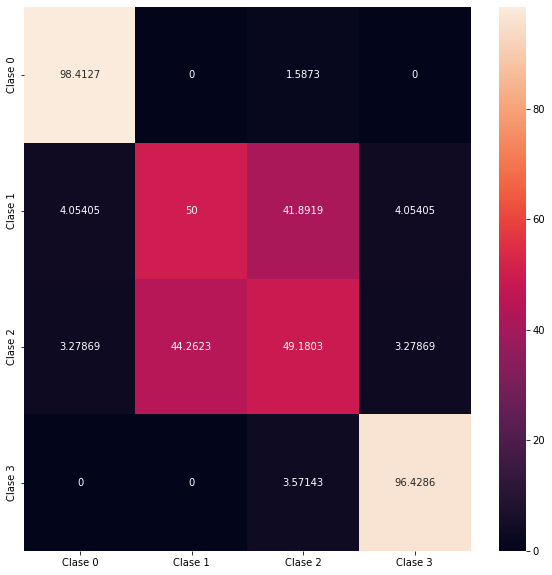

In [43]:
Matriz = confusion_matrix(y_true = Y_Test, y_pred = Clases_HGB_1, normalize = 'true')
Clases = ["Clase 0", "Clase 1", "Clase 2", "Clase 3"]

plt.figure(figsize=(10,10))
ax = sns.heatmap(100*Matriz, annot = True, fmt = 'g', xticklabels = Clases, yticklabels = Clases)
plt.show()

In [44]:
# Fuente del código: https://github.com/vinyluis/Articles/blob/main/ROC%20Curve%20and%20ROC%20AUC/ROC%20Curve%20-%20Multiclass.ipynb

def calculate_tpr_fpr(y_real, y_pred):
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    tpr =  TP/(TP + FN) 
    fpr = 1 - TN/(TN+FP)  
    
    return tpr, fpr

def get_all_roc_coordinates(y_real, y_proba):
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_proba)):
        threshold = y_proba[i]
        y_pred = y_proba >= threshold
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

def plot_roc_curve(tpr, fpr, scatter = True, ax = None):    
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()
    
    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'red', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

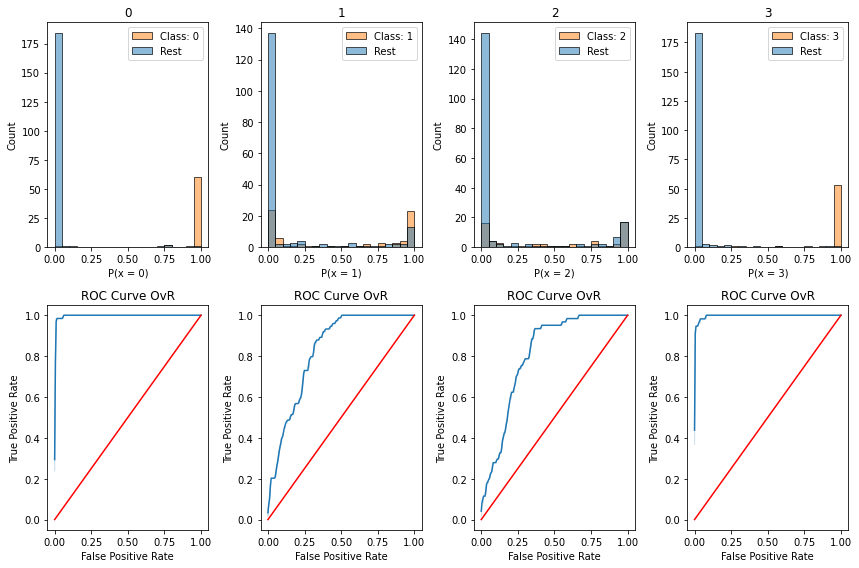

In [45]:
plt.figure(figsize = (12, 8))
bins = [i/20 for i in range(20)] + [1]
classes = HGB_1.classes_
y_proba = HGB_1.predict_proba(X_Norm_Test)
roc_auc_ovr = {}

for i in range(len(classes)):
    c = classes[i]
    df_aux = X_Norm_Test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in Y_Test]
    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)
    
    ax = plt.subplot(2, 4, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")
    
    ax_bottom = plt.subplot(2, 4, i+5)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
plt.tight_layout()